# PCA Analysis
This Notebook Applies Dimensionality Reduction (PCA) to retain essential features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1. Load the cleaned dataset 

In [2]:
df = pd.read_csv("../data/cleaned_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 2. Apply PCA

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)

## 3. Determine the optimal number of PC

In [4]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance < 0.95).sum() + 1

print(f"Optimal number of components: {n_components}")

Optimal number of components: 13


## 4. Visualize PCA

### Applying PCA with the optimal number of PC

In [5]:
pca_opt = PCA(n_components=n_components)
X_pca_opt = pca_opt.fit_transform(X)

### Cumulative variance plot

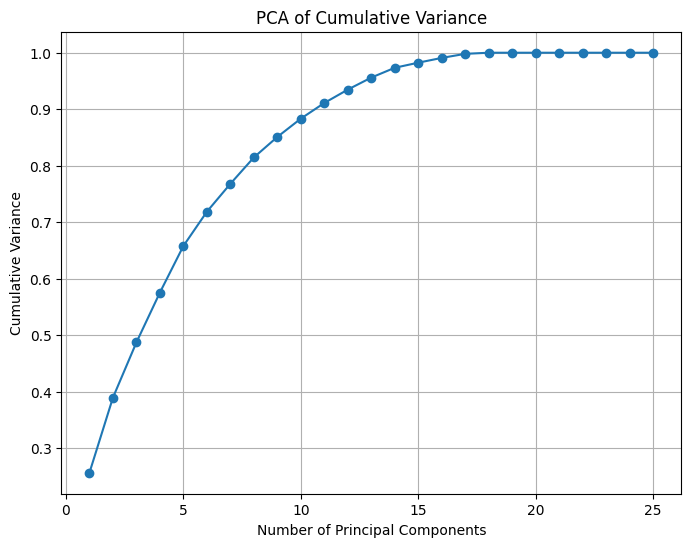

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.title("PCA of Cumulative Variance")
plt.grid(True)
plt.show()

### Scatter plot

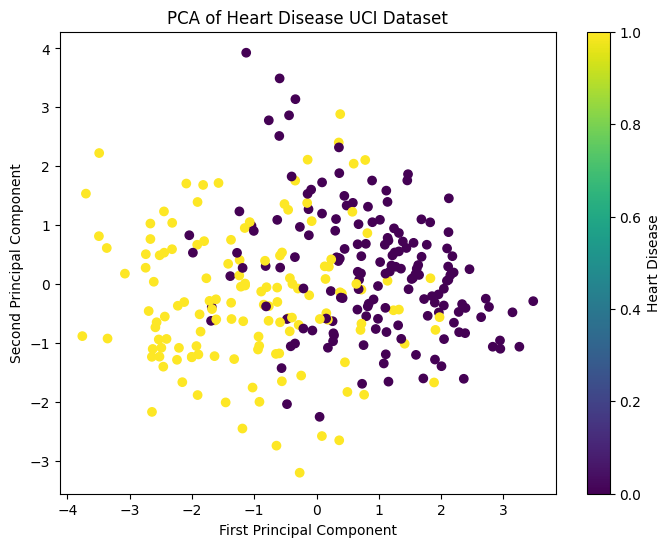

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], c=y, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Heart Disease UCI Dataset")
plt.colorbar(label="Heart Disease")
plt.show()

## 5. Save the PCA dataset

In [8]:
pca_columns = []
for i in range(X_pca_opt.shape[1]):
    pca_columns.append("PC" + str(i+1))

df_pca = pd.DataFrame(X_pca_opt, columns=pca_columns)
df_pca["target"] = y.values

df_pca.to_csv("../data/pca_heart_disease.csv", index=False)